<a href="https://colab.research.google.com/github/azizsghaier111/CV-projects/blob/main/stage_ingenieur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print("GPU Available:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: True


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gfIzeaVd0MbqDoM1rB6a")
project = rf.workspace("higher-school-of-communication-of-tunis-gn4xj").project("potholes-fqm5k")
dataset = project.version(2).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 940.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=1835b816833a285503079f1075bcd73dc38417ba4f46cc30ca17f2ab7d313e31
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
     

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.

Extracting Dataset Version Zip to potholes-2 in yolov8:: 100%|██████████| 22818/22818 [00:07<00:00, 2923.02it/s]


Checkpoint

In [ ]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil
# Copy the downloaded dataset to your Google Drive
shutil.move("/content/potholes-2", "/content/drive/My Drive/stageingenieur")

'/content/drive/My Drive/stageingenieur/potholes-2'

In [ ]:
!nvidia-smi

Thu Aug 24 20:37:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    27W /  70W |    387MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Checkpoint

In [ ]:
!pip install --upgrade pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [ ]:
! pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.5/609.5 kB 7.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ultralytics import YOLO

# Load the model.
model = YOLO('yolov8n.pt')

# Training.
results = model.train(
   data='/content/drive/MyDrive/stageingenieur/potholes-2/data.yaml',
   imgsz=640,
   epochs=100,
   batch=16,
   name='yolov8n_custom' )



Evaluation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('/content/runs/detect/yolov8n_custom/results.csv')
print(data.columns)
data.rename(columns=lambda x: x.strip(), inplace=True)
# Extract relevant columns
epochs = data['epoch']
train_box_loss = data['train/box_loss']
train_cls_loss = data['train/cls_loss']
train_dfl_loss = data['train/dfl_loss']
precision_B = data['metrics/precision(B)']
recall_B = data['metrics/recall(B)']
# mAP50_B = data['metrics/mAP50(B)']
# mAP50_95_B = data['metrics/mAP50-95(B)']
val_box_loss = data['val/box_loss']
val_cls_loss = data['val/cls_loss']
val_dfl_loss = data['val/dfl_loss']

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_box_loss, label='Train Box Loss')
plt.plot(epochs, train_cls_loss, label='Train Class Loss')
plt.plot(epochs, train_dfl_loss, label='Train DFL Loss')
plt.plot(epochs, val_box_loss, label='Validation Box Loss')
plt.plot(epochs, val_cls_loss, label='Validation Class Loss')
plt.plot(epochs, val_dfl_loss, label='Validation DFL Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, precision_B, label='Precision (B)')
plt.plot(epochs, recall_B, label='Recall (B)')
# plt.plot(epochs, mAP50_B, label='mAP50 (B)')
# plt.plot(epochs, mAP50_95_B, label='mAP50-95 (B)')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and mAP')
plt.legend()
plt.grid(True)
plt.show()


Checkpoint

In [ ]:
import shutil
shutil.copy("/content/runs/detect/yolov8n_custom/weights/best.pt", "/content/drive/My Drive/stageingenieur/models")


'/content/drive/My Drive/stageingenieur/models/best.pt'

In [ ]:
shutil.copytree("/content/runs", "/content/drive/My Drive/stageingenieur/models/runs")

'/content/drive/My Drive/stageingenieur/models/runs'

Eval mode

In [ ]:
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ultralytics import YOLO
import torch
model = YOLO('/content/drive/My Drive/stageingenieur/models/best.pt')
# Load the model.


In [ ]:
!pip install moviepy


In [ ]:
import cv2

# Assuming 'tracked_frames' contains your tracked frames or 'tracked_video' contains your tracked video
# Replace 'output_filename.mp4' with the desired output filename
output_filename = '/path/to/output_filename.mp4'

# If you have individual frames as a list:
# for frame_number, frame in enumerate(tracked_frames):
#     cv2.imwrite(f'frame_{frame_number:04d}.png', frame)

# If you have a video (if 'show=True' in model.track() function):
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
height, width, _ = tracked_video[0].shape
video_writer = cv2.VideoWriter(output_filename, fourcc, 30, (width, height))

# Write each frame to the video
for frame in tracked_video:
    video_writer.write(frame)

# Release the video writer
video_writer.release()



WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/863) /content/drive/MyDrive/stageingenieur/potholess.mp4: 384x640 2 D40s, 190.1ms
video 1/1 (2/863) /content/drive/MyDrive/stageingenieur/potholess.mp4: 384x640 2 D40s, 27.5ms
video 1/1 (3/863) /content/drive/MyDrive/stageingenieur/potholess.mp4: 384x640 2 D40s, 23.8ms
video 1/1 (4/863) /content/drive/MyDrive/stageingenieur/potholess.mp4: 384x640 2 D40s, 9.8ms
video 1/1

AttributeError: ignored

In [ ]:
from PIL import Image

def preprocess(image_path):
    # Open the image using Pillow
    image = Image.open(image_path)

    # Resize the image to 640x480 while preserving the aspect ratio
    resized_image = image.resize((640, 480))

    # Convert the image to grayscale
    grayscale_image = resized_image.convert('L')

    return grayscale_image


In [ ]:
image='/content/drive/My Drive/stageingenieur/images.jpg'


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image, ImageDraw

cv2.__version__

'4.7.0'


0: 480x640 5 D40s, 95.4ms
Speed: 1.5ms preprocess, 95.4ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[5.3568e+01, 1.6321e+02, 5.7858e+02, 3.8126e+02, 9.0439e-01, 0.0000e+00],
        [1.2353e+02, 9.5144e+01, 3.3614e+02, 1.5596e+02, 8.3422e-01, 0.0000e+00],
        [1.8110e+02, 4.7864e+01, 3.0124e+02, 8.3234e+01, 7.0848e-01, 0.0000e+00],
        [3.3636e+01, 4.7290e+01, 1.6498e+02, 7.4307e+01, 6.5073e-01, 0.0000e+00],
        [1.7964e+02, 5.4541e+01, 2.8674e+02, 8.4500e+01, 3.9749e-01, 0.0000e+00]], device='cuda:0')
cls: tensor([0., 0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.9044, 0.8342, 0.7085, 0.6507, 0.3975], device='cuda:0')
data: tensor([[5.3568e+01, 1.6321e+02, 5.7858e+02, 3.8126e+02, 9.0439e-01, 0.0000e+00],
        [1.2353e+02, 9.5144e+01, 3.3614e+02, 1.5596e+02, 8.3422e-01, 0.0000e+00],
        [1.8110e+02, 4.7864e+01, 3.0124e+02, 8.3234e+01, 7.0848e-01, 0.0000e+00],
        [3.3636e+01, 4.7290e+01, 1.6498e+02, 7.4307e+01, 6.5073e-01, 0.0000e+00],
        [1.7964e+02, 5.4541e+01, 2.8674e+02, 8.450

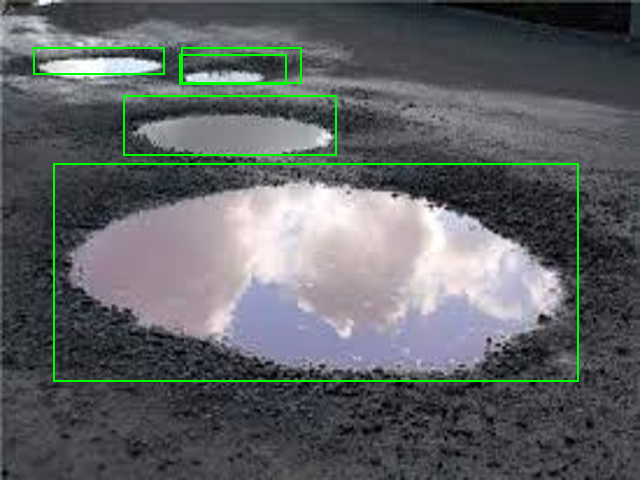

In [ ]:
def detect(image_path):
  image = Image.open(image_path)

  # Resize the image to 640x480 while preserving the aspect ratio
  resized_image = image.resize((640, 480))

  # Convert the image to grayscale
  grayscale_image = resized_image.convert('L')
  results = model.predict(grayscale_image)
  cord=results[0].boxes.xyxy
  pos=[]
  print(results[0].boxes)
  for i in cord :
    xmin, ymin, xmax, ymax = int(i[0]),int(i[1]),int(i[2]),int(i[3])
    pos.append([(xmin, ymin), (xmax, ymax)])
    print('dsdsd')
    print(xmin, ymin, xmax, ymax)
    color = (0, 255, 0)  # Green color for the bounding box (BGR format)
    thickness = 2       # Thickness of the bounding box

    draw = ImageDraw.Draw(resized_image)
    rectangle_coords = [(xmin, ymin), (xmax, ymax)]
    color = (0, 255, 0)  # Green color for the bounding box (RGB format)
    thickness = 2       # Thickness of the bounding box
    draw.rectangle(rectangle_coords, outline=color, width=thickness)

  # Show the image with the bounding box
  return resized_image

# Call the detect function with the image path
detect(image)


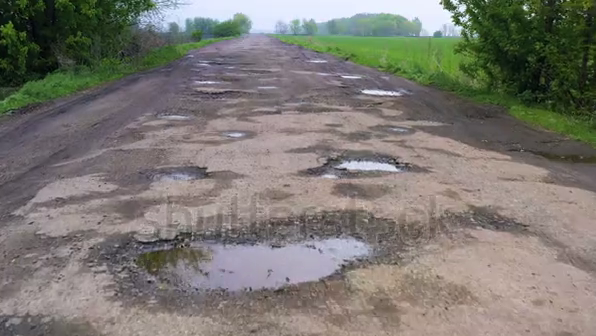

KeyboardInterrupt: ignored

In [ ]:
import cv2
from IPython.display import display, clear_output

def visualize_video(video_path):
    # Load the video using OpenCV
    video_capture = cv2.VideoCapture(video_path)

    while True:
        ret, frame = video_capture.read()
        if not ret:
            break

        # Convert the frame from BGR to RGB for displaying with PIL
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame in the notebook
        display(Image.fromarray(frame_rgb))
        clear_output(wait=True)

    # Release video capture object
    video_capture.release()
visualize_video(video_path)